In [114]:
import pandas as pd 
import numpy as np
dataset = pd.read_excel("../Data/Womens Clothing Reviews Data New.xlsx")
dataset

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...
22637,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,5,1,Great dress for many occasions I was very happ...
22638,862,General Petite,Tops,Knits,Gurgaon,Web,48,3,1,Wish it was made of cotton It reminds me of ma...
22639,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,3,0,"Cute, but see through This fit well, but the t..."
22640,1084,General,Dresses,Dresses,Gurgaon,Web,28,3,1,"Very cute dress, perfect for summer parties an..."


In [115]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary resources for SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pholl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [116]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review'],
      dtype='object')

In [117]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have loaded your dataset into the variable 'dataset'

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores using SentimentIntensityAnalyzer
def get_sentiment_score(row):
    sentiment_score = analyzer.polarity_scores(row['Merged_Review'])
    return sentiment_score['compound']

# Apply the sentiment analysis function to each row of the DataFrame
dataset['sentiment_score'] = dataset.apply(get_sentiment_score, axis=1)

# Function to get sentiment category based on the compound score
def get_sentiment_category(compound_score):
    if compound_score > 0.1:
        return 'Positive'
    elif compound_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to each row of the DataFrame
dataset['sentiment_category'] = dataset['sentiment_score'].apply(get_sentiment_category)

# Display the DataFrame with the added 'sentiment_category' column
print(dataset[['Merged_Review', 'sentiment_category']])

                                           Merged_Review sentiment_category
0       Absolutely wonderful - silky and sexy and com...           Positive
1       Love this dress!  it's sooo pretty.  i happen...           Positive
2      Some major design flaws I had such high hopes ...           Positive
3      My favorite buy! I love, love, love this jumps...           Positive
4      Flattering shirt This shirt is very flattering...           Positive
...                                                  ...                ...
22637  Great dress for many occasions I was very happ...           Positive
22638  Wish it was made of cotton It reminds me of ma...           Positive
22639  Cute, but see through This fit well, but the t...           Positive
22640  Very cute dress, perfect for summer parties an...           Positive
22641  Please make more like this one! This dress in ...           Positive

[22642 rows x 2 columns]


In [118]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive


In [119]:
# Calculate the total positive, negative, and neutral sentiments using value_counts()
sentiment_counts = dataset['sentiment_category'].value_counts()

# Display the total positive, negative, and neutral sentiments
print(sentiment_counts)

Positive    21089
Negative     1208
Neutral       345
Name: sentiment_category, dtype: int64


In [120]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review',
       'sentiment_score', 'sentiment_category'],
      dtype='object')

In [121]:
# import plotly.express as px

# # Assuming sentiment_counts is a DataFrame containing the sentiment counts
# # Create a bar plot using Plotly Express to visualize the distribution of sentiments
# fig_bar = px.bar(sentiment_counts, x='sentiment_category', y='count', color='sentiment_category',
#                  labels={'sentiment_category': 'Sentiment', 'count': 'Count'},
#                  title='Sentiment Distribution in the Dataset')

# # Show the bar plot
# fig_bar.show()

# # Create a pie chart using Plotly Express to visualize the distribution of sentiments
# fig_pie = px.pie(sentiment_counts, values='count', names='sentiment_category',
#                  title='Sentiment Distribution in the Dataset')

# # Show the pie chart
# fig_pie.show()


In [122]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec 
# import seaborn as sns
# import plotly.express as px
# # Calculate the total positive, negative, and neutral sentiments using value_counts()
# sentiment_counts = dataset['sentiment_category'].value_counts().reset_index()

# # Create a bar plot using Plotly Express to visualize the distribution of sentiments
# fig_bar = px.bar(sentiment_counts, x='index', y='sentiment_category', color='index',
#                  labels={'index': 'Sentiment', 'sentiment_category': 'Count'},
#                  title='Sentiment Distribution in the Dataset')

# # Create a pie chart using Plotly Express to visualize the distribution of sentiments
# fig_pie = px.pie(sentiment_counts, values='sentiment_category', names='index',
#                  title='Sentiment Distribution in the Dataset')

# # Display both the bar plot and pie chart side by side
# fig_bar.show()
# fig_pie.show()

In [123]:
dataset.Rating.value_counts()

5    12541
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [124]:
pd.crosstab(dataset.sentiment_category, dataset.Rating)

Rating,1,2,3,4,5
sentiment_category,,,,,
Negative,286,330,348,147,97
Neutral,58,87,112,53,35
Positive,477,1132,2363,4708,12409


In [125]:
""" Divide the data into three groups on the basis of sentiments like positive, negative and neutral """
dataset_neg = dataset[(dataset.sentiment_category=='Negative')]
dataset_pos = dataset[(dataset.sentiment_category=='Positive')]
dataset_neu = dataset[(dataset.sentiment_category=='Neutral')]

In [126]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Rating', 'Recommend_Flag', 'Merged_Review',
       'sentiment_score', 'sentiment_category'],
      dtype='object')

In [127]:
""" plit the data into train & Test where y variable is Rating """
from sklearn.model_selection import train_test_split
## X-variable is Merged_Review and y-variable is Rating
# define X and y
X = dataset.Merged_Review
y = dataset.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16981,)
(5661,)
(16981,)
(5661,)


In [128]:
""" Split the data into train & Test for positive sentiments and negative sentiments """
# create a new DataFrame that only contains the 5 Rating and 1-Rating reviews
# define X and y
X2 = dataset_pos.Merged_Review
y2 = dataset_pos.Rating

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(15816,)
(5273,)
(15816,)
(5273,)


In [129]:
# define X and y
X1 = dataset_neg.Merged_Review
y1 = dataset_neg.Rating

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(906,)
(302,)
(906,)
(302,)


In [130]:
dataset_pos.shape

(21089, 12)

In [131]:
dataset_neg.shape

(1208, 12)

In [132]:
""" Creating user defined functions for clean the text and pre-process the data """
import re
from nltk.tokenize import word_tokenize
def clean_text(Merged_Review):
    Merged_Review = Merged_Review.lower()
    Merged_Review = Merged_Review.strip()
    Merged_Review = re.sub(r' +', ' ', Merged_Review)
    Merged_Review = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Merged_Review)
    Merged_Review = Merged_Review.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return Merged_Review

In [133]:
import nltk
nltk.download('stopwords')

sw = list(set(nltk.corpus.stopwords.words('english')))
print(sw)

['over', 'her', 'my', 'about', "should've", 'most', 'do', 'whom', "wouldn't", 'be', 'doing', 'where', 'at', "that'll", 'but', 'it', 'or', 'couldn', 'should', 'yourself', 'when', 'doesn', 'down', 'not', 're', 'have', 'between', 'weren', 'such', "hadn't", 'our', 'd', 'while', "aren't", 'y', 'from', 'shan', 'out', 'll', 'the', 'into', 'under', 'can', 'who', 'they', 'further', "don't", 'during', 'm', 'its', 'your', 'had', 'am', 'hadn', 'how', "shouldn't", 'yourselves', 'hasn', 'needn', 'an', 'other', 'after', 'if', 'just', 'yours', 'then', 'through', 'mightn', 'until', "mustn't", 'some', 'before', 'haven', 'ma', "you'll", "won't", 'off', 's', 'didn', 'of', "weren't", 'will', 'mustn', 'don', 'that', 'and', 'won', 'him', 'those', "mightn't", 'has', 'above', 'each', 'herself', "shan't", "she's", 'a', 'shouldn', 'his', 'were', 'was', 'because', "haven't", 'i', 'as', 'ours', 'so', 'up', 'myself', "couldn't", 'all', 'does', 'themselves', 'hers', 'them', 'again', 'any', "didn't", 'we', 'aren', 't

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pholl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Create a set of English stopwords
stop = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def pre_process(Merged_Review):
    Merged_Review = Merged_Review.str.replace('/', '')  # Replacing the / with none
    Merged_Review = Merged_Review.apply(lambda x: " ".join(word for word in word_tokenize(x) if word not in stop))  # Removing stop words
    Merged_Review = Merged_Review.apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))  # Lemmatization
    return Merged_Review

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pholl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pholl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pholl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [136]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

CLean the text and pre-process the data for positive sentiments


In [137]:
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [138]:
X2_train=pre_process(X2_train)
X2_test=pre_process(X2_test)

In [139]:
X2_train

16673    gorgous design poor fit suit absolutely gorgeo...
6499     knockoff dress gorgeous flattering oood qualit...
8615     cozy soft shirt love shirt subdued color casua...
17057    classy tried store ended size almost could gon...
8238     dont try arent prepared buy love jacket great ...
                               ...                        
11754             love love shirt fit great cute must fall
18557    im thrilled fabric little heavier fit really w...
5567     cute run large top run large loose fitting mid...
13057    wanted love like feel stretch softness dress c...
253      pretty denim jacket perfect jacket shirt tee d...
Name: Merged_Review, Length: 15816, dtype: object

CLean the text and pre-process the data for negative sentiments

In [140]:
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [141]:
X1_train=pre_process(X1_train)
X1_test=pre_process(X1_test)

In [142]:
X1_train

13594    doesnt look like photo arrived week disappoint...
13390    didnt work im shorter side spectrum usually we...
3903     product hole pocket area soft comfortable jack...
18013    returning thought dress would perfect th birth...
15187    returned immediately first product arrived sma...
                               ...                        
13868    odd fit dress odd fit loose top pointy dart ti...
17329    fabric comfortable pretty blouse polyester fab...
20594    underwhelmed stalked blouse price dropped poun...
4369     white background love top everything previous ...
19826    oh dear elastic waistband ruined skirt meit ma...
Name: Merged_Review, Length: 906, dtype: object

Vectorization (Count, Tfidf) for positive sentiments

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
#Train
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [144]:
xtrain2_count

<15816x800 sparse matrix of type '<class 'numpy.int64'>'
	with 363350 stored elements in Compressed Sparse Row format>

Vectorization (Count, Tfidf) for negative sentiments


In [145]:
#Train
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

In [146]:
xtrain1_count

<906x800 sparse matrix of type '<class 'numpy.int64'>'
	with 19773 stored elements in Compressed Sparse Row format>

View the document term metrics for positive sentiments


In [147]:
dtm=xtrain2_count.toarray()

In [148]:
feature_names = count_vect2.get_feature_names_out()
feature_names

array(['able', 'absolutely', 'across', 'actually', 'add', 'added',
       'addition', 'adorable', 'adore', 'ag', 'ago', 'agree', 'airy',
       'aline', 'almost', 'along', 'already', 'also', 'although',
       'always', 'amazing', 'amount', 'anighthing', 'ankle', 'another',
       'anyone', 'anyway', 'appears', 'appropriate', 'area', 'arent',
       'arm', 'armhole', 'around', 'arrived', 'athletic', 'attractive',
       'available', 'average', 'away', 'awesome', 'awkward', 'b', 'baby',
       'back', 'bad', 'bag', 'baggy', 'band', 'barely', 'based', 'basic',
       'bc', 'beach', 'beading', 'beautiful', 'beautifully', 'beauty',
       'believe', 'belly', 'belt', 'best', 'better', 'big', 'bigger',
       'billowy', 'bit', 'black', 'blazer', 'blouse', 'blue', 'bodice',
       'body', 'boot', 'booty', 'bottom', 'bought', 'boxy', 'bra',
       'brand', 'breezy', 'bright', 'broad', 'brown', 'build', 'bulky',
       'bust', 'busty', 'butt', 'button', 'buy', 'buying', 'c', 'came',
       'cam

In [149]:
dtm1=pd.DataFrame(dtm, columns = count_vect2.get_feature_names_out())
dtm1

,able,absolutely,across,actually,add,added,addition,adorable,adore,ag,...,xd,xl,xx,year,yellow,yes,yet,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
dtm1.apply(sum)

able          296
absolutely    638
across        243
actually      475
add           442
             ... 
yes           172
yet           482
youre         282
zip           109
zipper        278
Length: 800, dtype: int64

View the document term metrics for negative sentiments


In [151]:
dtm4=xtrain1_count.toarray()
print(count_vect1.get_feature_names_out())

['able' 'absolutely' 'across' 'actually' 'add' 'added' 'adorable' 'afraid'
 'ago' 'agree' 'ala' 'aline' 'almost' 'along' 'already' 'also' 'although'
 'always' 'amazing' 'amount' 'anighthing' 'ankle' 'another' 'anyone'
 'anyway' 'apart' 'appears' 'area' 'arent' 'arm' 'armhole' 'armpit'
 'around' 'arrived' 'assumed' 'attached' 'available' 'average' 'avoid'
 'away' 'awesome' 'awful' 'awkward' 'b' 'back' 'backside' 'bad' 'bag'
 'baggy' 'band' 'barely' 'based' 'basically' 'bead' 'beautiful' 'behind'
 'belt' 'best' 'better' 'beware' 'big' 'bigger' 'bit' 'black' 'blah'
 'blazer' 'blouse' 'blue' 'bodice' 'body' 'boob' 'boot' 'boring' 'bother'
 'bottom' 'bought' 'box' 'boxy' 'bra' 'brand' 'breast' 'bright' 'broad'
 'broke' 'brown' 'built' 'bulk' 'bulky' 'bummer' 'bust' 'busty' 'butt'
 'button' 'buy' 'buying' 'c' 'calf' 'came' 'cami' 'camisole' 'cant'
 'cardigan' 'care' 'case' 'casual' 'center' 'cheap' 'chest' 'chested'
 'cling' 'close' 'closely' 'clothes' 'clothing' 'coat' 'cold' 'collar'
 'col

In [152]:
dtm5=pd.DataFrame(dtm4, columns = count_vect1.get_feature_names_out())
dtm5

,able,absolutely,across,actually,add,added,adorable,afraid,ago,agree,...,xx,year,yellow,yesterday,yet,youd,youre,zip,zipped,zipper
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
904,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
dtm5.apply(sum)

able          18
absolutely    20
across        14
actually      21
add            8
              ..
youd           5
youre         10
zip           22
zipped         8
zipper        34
Length: 800, dtype: int64

Word frequencies for positive sentiments


In [154]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

In [155]:
word_freq

,freq
also,1788
arm,1011
around,813
absolutely,638
adorable,580
another,543
almost,506
area,491
amazing,479
actually,475


In [156]:
word_freq_dictionary = dict(dtm1.apply(sum))
word_freq

,freq
also,1788
arm,1011
around,813
absolutely,638
adorable,580
another,543
almost,506
area,491
amazing,479
actually,475


In [157]:
# import pandas as pd
# import plotly.express as px

# # Assuming word_freq is a DataFrame containing the word frequencies
# # Sort the DataFrame by frequency in descending order
# word_freq.sort_values('freq', ascending=False, inplace=True)

# # Reset the index (and drop the existing 'level_0' column)
# word_freq.reset_index(drop=True, inplace=True)

# # Create the bar graph using Plotly Express
# fig = px.bar(word_freq, x='index', y='freq', color='index', color_discrete_sequence=px.colors.qualitative.Pastel1)

# # Customize the layout
# fig.update_layout(
#     title='Word Frequency',
#     xaxis_title='Words',
#     yaxis_title='Frequency',
#     showlegend=False  # Hide the legend
# )

# # Show the plot
# fig.show()


Word frequencies for negative sentiments


In [158]:
word_freq1 = pd.DataFrame(dtm5.apply(sum).head(40), columns=['freq'])
word_freq1.sort_values('freq', ascending=False, inplace=True)

In [159]:
word_freq_dictionary1 = dict(dtm5.apply(sum))

In [160]:
word_freq_dictionary1

{'able': 18,
 'absolutely': 20,
 'across': 14,
 'actually': 21,
 'add': 8,
 'added': 11,
 'adorable': 20,
 'afraid': 5,
 'ago': 6,
 'agree': 9,
 'ala': 6,
 'aline': 7,
 'almost': 33,
 'along': 11,
 'already': 11,
 'also': 146,
 'although': 14,
 'always': 23,
 'amazing': 9,
 'amount': 5,
 'anighthing': 17,
 'ankle': 12,
 'another': 41,
 'anyone': 12,
 'anyway': 6,
 'apart': 6,
 'appears': 17,
 'area': 53,
 'arent': 7,
 'arm': 79,
 'armhole': 19,
 'armpit': 12,
 'around': 58,
 'arrived': 29,
 'assumed': 5,
 'attached': 7,
 'available': 12,
 'average': 9,
 'avoid': 6,
 'away': 18,
 'awesome': 6,
 'awful': 38,
 'awkward': 40,
 'b': 18,
 'back': 207,
 'backside': 6,
 'bad': 70,
 'bag': 16,
 'baggy': 16,
 'band': 20,
 'barely': 11,
 'based': 9,
 'basically': 8,
 'bead': 7,
 'beautiful': 71,
 'behind': 7,
 'belt': 14,
 'best': 12,
 'better': 33,
 'beware': 8,
 'big': 108,
 'bigger': 11,
 'bit': 88,
 'black': 41,
 'blah': 7,
 'blazer': 5,
 'blouse': 54,
 'blue': 33,
 'bodice': 7,
 'body': 41,


For making word_clouds for postive sentiments


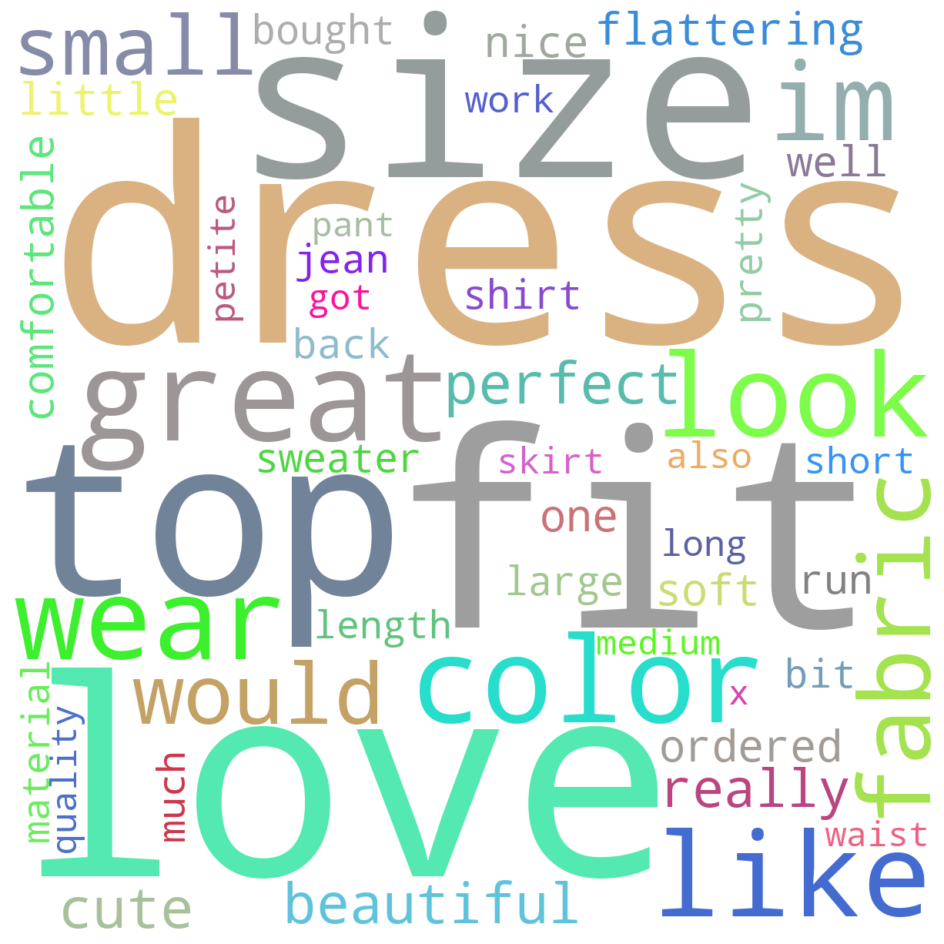

In [161]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random

# Create a custom color map
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(50.0 + 20.0 * random.random())
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Calculate the desired aspect ratio (width:height)
aspect_ratio = 1  # Since the desired figsize is 12x12, the aspect ratio is 1 (square)

# Calculate the width and height based on the aspect ratio and desired figsize
figsize = (12, 12)  # Desired figsize
width = int(figsize[0] * 100)  # Convert to inches and then to pixels
height = int(width / aspect_ratio)

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    color_func=random_color_func,
    width=width,
    height=height,
    max_words=50,
    random_state=42
)

# Generate the word cloud from word_freq_dictionary
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

# Plot the word cloud
plt.figure(figsize=figsize)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

For making word_clouds for negative sentiments


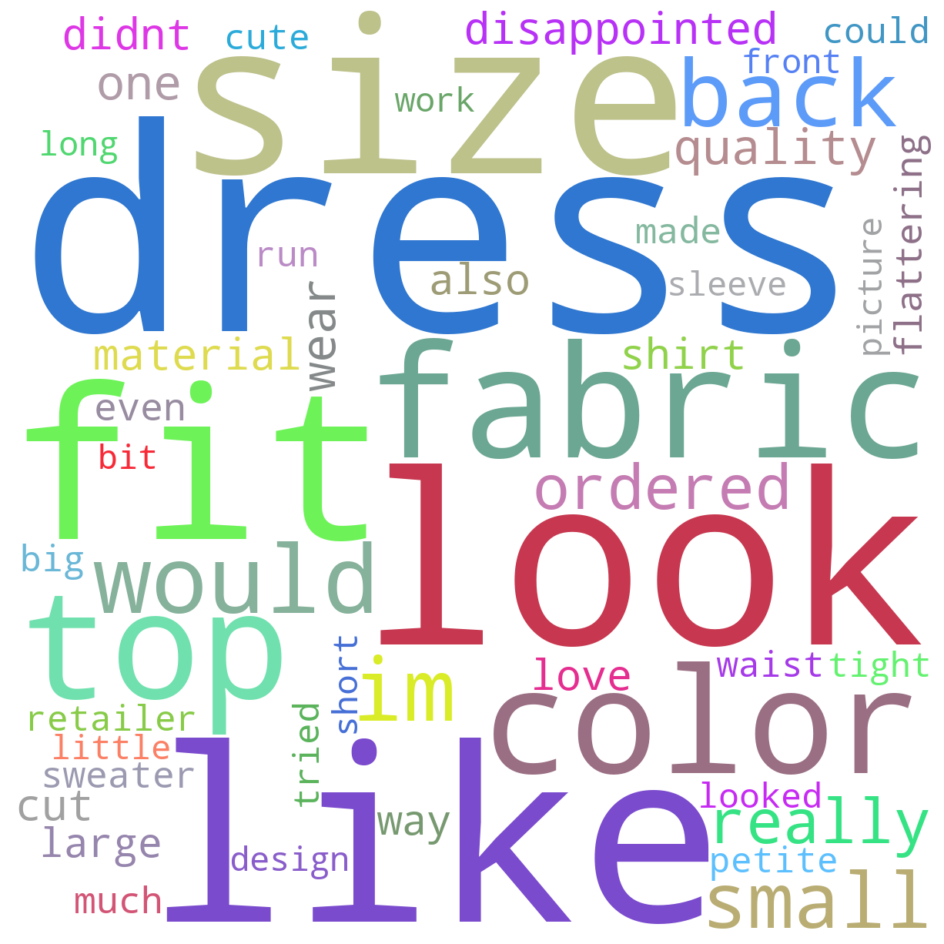

In [162]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random

# Create a custom color map
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(50.0 + 20.0 * random.random())
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Calculate the desired aspect ratio (width:height)
aspect_ratio = 1  # Since the desired figsize is 12x12, the aspect ratio is 1 (square)

# Calculate the width and height based on the aspect ratio and desired figsize
figsize = (12, 12)  # Desired figsize
width = int(figsize[0] * 100)  # Convert to inches and then to pixels
height = int(width / aspect_ratio)

# Create a WordCloud object with custom parameters
wordcloud1 = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    color_func=random_color_func,
    width=width,
    height=height,
    max_words=50,
    random_state=42
)

# Generate the word cloud from word_freq_dictionary
wordcloud1 = wordcloud1.generate_from_frequencies(word_freq_dictionary1)

# Plot the word cloud
plt.figure(figsize=figsize)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

c. Understand sentiment among the customers on the different categories, sub categories,products by location and age group

In [163]:
dataset['age_group'] = pd.cut(x= dataset.Customer_Age,bins=[20, 29, 39, 49,59 ,69,79,89 ,99])

In [164]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive,"(39, 49]"


In [165]:
dataset.groupby(['Location', 'age_group','Category','SubCategory1','SubCategory2',"sentiment_category" ]).agg({'sentiment_category': 'count'})

sentiment_category
Location  age_group Category  SubCategory1 SubCategory2   sentiment_category                    
Bangalore (20, 29]  General   Bottoms      Blouses        Negative                             0
                                                          Neutral                              0
                                                          Positive                             0
                                           Casual bottoms Negative                             0
                                                          Neutral                              0
...                                                                                          ...
Mumbai    (89, 99]  Initmates Trend        Swim           Neutral                              0
                                                          Positive                             0
                                           Trend          Negative                             0
                                                          Neutral                              0
                                                          Positive                             0

[34560 rows x 1 columns]

In [166]:
""" 
d. Perform predictive analytics to understand the drivers of customers who are 
recommending the products. 

Regression model
Vectorization (count, tfidf) for both train & test
"""

' \nd. Perform predictive analytics to understand the drivers of customers who are \nrecommending the products. \n\nRegression model\nVectorization (count, tfidf) for both train & test\n'

In [167]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive,"(39, 49]"


In [168]:
""" Split the data in X and Y ( Recommend_Flag) """

' Split the data in X and Y ( Recommend_Flag) '

In [169]:
## X-variable is Review_text and y-variable is Rating
# define X and y
X4 = dataset.Merged_Review
y4 = dataset.Recommend_Flag

# split the new DataFrame into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(16981,)
(5661,)
(16981,)
(5661,)


In [170]:
# Making a model using X_train (Merged_Review) data

In [171]:
X4_train = X4_train.apply(lambda x: clean_text(x))
X4_test = X4_test.apply(lambda x: clean_text(x))

In [172]:
# Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase=True,
                             encoding='latin-1', 
                             max_features=100)
X_train_count4 = count_vect.fit_transform(X4_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1', 
                             lowercase=True,
                             max_features=100)
X_train_tfidf4 = tfidf_vect.fit_transform(X4_train)

# Test
X_test_count4 = count_vect.transform(X4_test)
X_test_tfidf4 = tfidf_vect.transform(X4_test)

dtm_count = pd.DataFrame(X_train_count4.toarray(), columns=count_vect.get_feature_names_out())
dtm_tfidf = pd.DataFrame(X_train_tfidf4.toarray(), columns=tfidf_vect.get_feature_names_out())


In [173]:
""" 
Adding Features to a Document-Term Matrix

Dummy Creation
 """

' \nAdding Features to a Document-Term Matrix\n\nDummy Creation\n '

In [174]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive,"(39, 49]"


In [175]:
# An utility function to create dummy variable
def create_dummies(dataset, colname):
    col_dummies = pd.get_dummies(dataset[colname], prefix = colname, drop_first = True)
    dataset = pd.concat([dataset, col_dummies], axis = 1)
    dataset.drop(colname, axis = 1, inplace = True )
    return dataset

In [176]:
catagory_varables = dataset[['Category', 'SubCategory1', 'SubCategory2', 'sentiment_category','Location', 'Channel']]

# for c_feature in categorical_features
for c_feature in ['Category', 'SubCategory1', 'SubCategory2', 'sentiment_category','Location', 'Channel']:
    catagory_varables[c_feature] = catagory_varables[c_feature].astype('category')
    catagory_varables = create_dummies(catagory_varables, c_feature)
 

catagory_varables.head()

C:\Users\pholl\AppData\Local\Temp\ipykernel_18324\3716304331.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category_General Petite,Category_Initmates,SubCategory1_Dresses,SubCategory1_Intimate,SubCategory1_Jackets,SubCategory1_Tops,SubCategory1_Trend,SubCategory2_Casual bottoms,SubCategory2_Chemises,SubCategory2_Dresses,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_category_Neutral,sentiment_category_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [177]:
dtm_count

,a,all,also,am,an,and,are,as,at,back,...,was,wear,well,when,which,will,with,work,would,you
0,3,0,0,0,1,4,0,0,0,0,...,1,1,1,0,2,0,0,0,0,0
1,2,0,1,0,1,2,1,0,0,1,...,1,0,0,1,2,0,0,0,0,0
2,1,0,0,0,0,6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,1,0,3,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,6,0,1,1,0,3,1,0,1,0,...,0,1,0,0,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,4,0,1,0,0,3,1,0,0,0,...,1,1,0,0,0,0,2,0,0,0
16977,5,0,0,0,1,3,1,0,0,1,...,0,1,1,0,1,1,1,0,0,1
16978,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16979,6,0,1,1,0,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [178]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment_score,sentiment_category,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.8932,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.9729,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.9427,Positive,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.7182,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.9436,Positive,"(39, 49]"


In [179]:
dataset_new =dataset.loc[:, [ 'Merged_Review', 'Customer_Age', 'Rating', 'sentiment_score','Recommend_Flag']]

In [180]:
dataset_new.head()

,Merged_Review,Customer_Age,Rating,sentiment_score,Recommend_Flag
0,Absolutely wonderful - silky and sexy and com...,33,4,0.8932,1
1,Love this dress! it's sooo pretty. i happen...,34,5,0.9729,1
2,Some major design flaws I had such high hopes ...,60,3,0.9427,0
3,"My favorite buy! I love, love, love this jumps...",50,5,0.7182,1
4,Flattering shirt This shirt is very flattering...,47,5,0.9436,1


In [181]:
data = pd.concat([ dataset_new,catagory_varables], axis =1)

In [182]:
data.columns

Index(['Merged_Review', 'Customer_Age', 'Rating', 'sentiment_score',
       'Recommend_Flag', 'Category_General Petite', 'Category_Initmates',
       'SubCategory1_Dresses', 'SubCategory1_Intimate', 'SubCategory1_Jackets',
       'SubCategory1_Tops', 'SubCategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_category_Neutral', 'sentiment_category_Positive',
       'Location_Chennai', 'Location_Gurgaon', 'Location_Mumbai',
       'Channel_Web'],
      dtype='object')

In [183]:
data.head()

,Merged_Review,Customer_Age,Rating,sentiment_score,Recommend_Flag,Category_General Petite,Category_Initmates,SubCategory1_Dresses,SubCategory1_Intimate,SubCategory1_Jackets,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_category_Neutral,sentiment_category_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
0,Absolutely wonderful - silky and sexy and com...,33,4,0.8932,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,Love this dress! it's sooo pretty. i happen...,34,5,0.9729,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Some major design flaws I had such high hopes ...,60,3,0.9427,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,"My favorite buy! I love, love, love this jumps...",50,5,0.7182,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,Flattering shirt This shirt is very flattering...,47,5,0.9436,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [184]:
#define X and y
feature_cols = ['Merged_Review', 'Customer_Age', 'Rating', 'sentiment_score',
       'Recommend_Flag', 'Category_General Petite', 'Category_Initmates',
       'SubCategory1_Dresses', 'SubCategory1_Intimate', 'SubCategory1_Jackets',
       'SubCategory1_Tops', 'SubCategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_category_Neutral', 'sentiment_category_Positive',
       'Location_Chennai', 'Location_Gurgaon', 'Location_Mumbai',
       'Channel_Web']
X = data[feature_cols]
y = data.Recommend_Flag

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [185]:
X_train.Merged_Review

10853    Cute and comfy The tank top fits well. i usual...
7464     Itchy and odd fit I was so bummed when this ca...
17084    Basic everyday joggers I just purchased these ...
18045    I love the fit and length of this sweater! Thi...
19034    Great fit, perfect for summer I bought this cu...
                               ...                        
10955    Love these pants I bought these about a month ...
17289    Black is see-through up close I'm usually a sm...
5192     Runs small Should have ordered the xl instead ...
12172    Great Love these-although i'm exchanging mine ...
235      Recommend but not for me Love pilcro, love the...
Name: Merged_Review, Length: 16981, dtype: object

In [186]:
# use  TfidfVectorizer with Merged_Review column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Merged_Review)
X_test_dtm = vect.transform(X_test.Merged_Review)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Merged_Review', axis=1).shape

(16981, 100)
(5661, 100)


(16981, 36)

In [187]:
print(vect.get_feature_names_out())

['_x000d_' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'casual' 'color' 'colors' 'comfortable' 'comfy' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'gorgeous' 'got' 'great' 'high'
 'jacket' 'jeans' 'just' 'large' 'lbs' 'length' 'like' 'little' 'long'
 'look' 'looked' 'looking' 'looks' 'loose' 'love' 'loved' 'lovely'
 'material' 'medium' 'model' 'nice' 'online' 'ordered' 'pants' 'perfect'
 'perfectly' 'person' 'petite' 'piece' 'pretty' 'price' 'purchased'
 'quality' 'really' 'retailer' 'right' 'runs' 'sale' 'shirt' 'short'
 'size' 'skirt' 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super'
 'sweater' 'think' 'tight' 'tried' 'true' 'true size' 'try' 'usually'
 'waist' 'wanted' 'way' 'wear' 'wearing' 'white' 'work' 'xs']


In [188]:
# use CountVectorizer with Merged_Review column only
vect = CountVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Merged_Review)
X_test_dtm = vect.transform(X_test.Merged_Review)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Merged_Review', axis=1).shape

(16981, 100)
(5661, 100)


(16981, 36)

In [189]:
print(vect.get_feature_names_out())

['_x000d_' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'casual' 'color' 'colors' 'comfortable' 'comfy' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'gorgeous' 'got' 'great' 'high'
 'jacket' 'jeans' 'just' 'large' 'lbs' 'length' 'like' 'little' 'long'
 'look' 'looked' 'looking' 'looks' 'loose' 'love' 'loved' 'lovely'
 'material' 'medium' 'model' 'nice' 'online' 'ordered' 'pants' 'perfect'
 'perfectly' 'person' 'petite' 'piece' 'pretty' 'price' 'purchased'
 'quality' 'really' 'retailer' 'right' 'runs' 'sale' 'shirt' 'short'
 'size' 'skirt' 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super'
 'sweater' 'think' 'tight' 'tried' 'true' 'true size' 'try' 'usually'
 'waist' 'wanted' 'way' 'wear' 'wearing' 'white' 'work' 'xs']


In [190]:
from scipy import sparse
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Merged_Review', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Merged_Review', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(5661, 136)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8572690337396219


In [192]:
print(dir(logreg))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n

In [193]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg.predict(X_train_dtm)
y_pred = logreg.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [194]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.67402096 0.8771097 ]

Recall :  [0.39598185 0.95746671]

F-Score : [0.49887732 0.91552833]

Accuracy :  0.8554266533184147


In [195]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.67814114 0.87775591]

Recall :  [0.38817734 0.95975032]

F-Score : [0.49373434 0.91692371]

Accuracy :  0.8572690337396219


In [196]:
#Saving model
import pickle
Pkl_Filename = "Pickle_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [197]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1000000000.0)

In [198]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test_dtm, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test_dtm)  
Ypredict

Test score: 85.73 %


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [199]:
print(vect.get_feature_names_out())

['_x000d_' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'casual' 'color' 'colors' 'comfortable' 'comfy' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'gorgeous' 'got' 'great' 'high'
 'jacket' 'jeans' 'just' 'large' 'lbs' 'length' 'like' 'little' 'long'
 'look' 'looked' 'looking' 'looks' 'loose' 'love' 'loved' 'lovely'
 'material' 'medium' 'model' 'nice' 'online' 'ordered' 'pants' 'perfect'
 'perfectly' 'person' 'petite' 'piece' 'pretty' 'price' 'purchased'
 'quality' 'really' 'retailer' 'right' 'runs' 'sale' 'shirt' 'short'
 'size' 'skirt' 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super'
 'sweater' 'think' 'tight' 'tried' 'true' 'true size' 'try' 'usually'
 'waist' 'wanted' 'way' 'wear' 'wearing' 'white' 'work' 'xs']


In [200]:
""" 
    So, Above we made one logistic model where Y variable is recommend_flag and X variable 
    is review_text. The model gives accuracy of 85.73% in train and test. The difference between 
    train and test accuracy is less so, we can say the model is good to use. The main key 
    drivers who are responsible for recommending the product are as above.
 """

' \n    So, Above we made one logistic model where Y variable is recommend_flag and X variable \n    is review_text. The model gives accuracy of 85.73% in train and test. The difference between \n    train and test accuracy is less so, we can say the model is good to use. The main key \n    drivers who are responsible for recommending the product are as above.\n '

In [201]:
#define X and y
feature_cols = ['Merged_Review', 'Customer_Age', 'Rating', 'sentiment_score',
       'Recommend_Flag', 'Category_General Petite', 'Category_Initmates',
       'SubCategory1_Dresses', 'SubCategory1_Intimate', 'SubCategory1_Jackets',
       'SubCategory1_Tops', 'SubCategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_category_Neutral', 'sentiment_category_Positive',
       'Location_Chennai', 'Location_Gurgaon', 'Location_Mumbai',
       'Channel_Web']
X = data[feature_cols]
y = data.Rating

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [202]:
# use TfidfVectorizer with Merged_Review column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Merged_Review)
X_test_dtm = vect.transform(X_test.Merged_Review)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Merged_Review', axis=1).shape

(16981, 100)
(5661, 100)


(16981, 36)

In [203]:
print(vect.get_feature_names_out())

['_x000d_' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'casual' 'color' 'colors' 'comfortable' 'comfy' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'gorgeous' 'got' 'great' 'high'
 'jacket' 'jeans' 'just' 'large' 'lbs' 'length' 'like' 'little' 'long'
 'look' 'looked' 'looking' 'looks' 'loose' 'love' 'loved' 'lovely'
 'material' 'medium' 'model' 'nice' 'online' 'ordered' 'pants' 'perfect'
 'perfectly' 'person' 'petite' 'piece' 'pretty' 'price' 'purchased'
 'quality' 'really' 'retailer' 'right' 'runs' 'sale' 'shirt' 'short'
 'size' 'skirt' 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super'
 'sweater' 'think' 'tight' 'tried' 'true' 'true size' 'try' 'usually'
 'waist' 'wanted' 'way' 'wear' 'wearing' 'white' 'work' 'xs']


In [204]:
# use logistic regression with text column only
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(X_train_dtm, y_train)
y_pred_class = logreg2.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5991874227168345


c:\Users\pholl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [205]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model3.fit(X_train_dtm,y_train)

KNeighborsClassifier(n_jobs=-1)

In [206]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg2.predict(X_train_dtm)
y_pred = logreg2.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [207]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.3649635  0.32454361 0.38529718 0.43855816 0.68327316]

Recall :  [0.16207455 0.13793103 0.34776471 0.2179696  0.90654604]

F-Score : [0.22446689 0.19358742 0.36557012 0.2912058  0.77923147]

Accuracy :  0.6076791708379954


In [208]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.34883721 0.3030303  0.33552632 0.41826923 0.68142652]

Recall :  [0.14705882 0.1285347  0.29226361 0.21323529 0.90495868]

F-Score : [0.20689655 0.18050542 0.31240429 0.28246753 0.77744402]

Accuracy :  0.5991874227168345


In [209]:
# Above model is useful where X variable is Merged_Review and Y variable is Rating. 

In [210]:
#Create user defined function for train Classification the models

In [211]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [212]:
#Naive Bayes (With only review_text in X-vribles)
#Naive Bayes on Count Vectors and TF-IDF
from sklearn import naive_bayes
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_dtm, y_train, X_test_dtm, y_test)
print("NB  for L1, TFIDF Vectors: ", accuracy_L1)

NB  for L1, TFIDF Vectors:  0.5594417947359124


In [213]:
#Logistic Regression
#Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_dtm, y_train, X_test_dtm, y_test)
print("LR  for L1, tfidf Vectors: ", accuracy_L1)

LR  for L1, tfidf Vectors:  0.600247306129659


c:\Users\pholl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [214]:
#Linear SVC
#Linear SVC on Count Vectors and TF-IDF
from sklearn import svm

accuracy_L1 = train_model(svm.LinearSVC(), X_train_dtm, y_train, X_test_dtm, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

c:\Users\pholl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



SVC  for L1, Count Vectors:  0.5968910086557145


In [215]:
#Hence from above logistic regression gives best result.save the model as pickle object.

In [216]:
print(vect.get_feature_names_out())

['_x000d_' 'beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought'
 'casual' 'color' 'colors' 'comfortable' 'comfy' 'cut' 'cute' 'definitely'
 'design' 'did' 'didn' 'does' 'don' 'dress' 'fabric' 'fall' 'feel' 'fit'
 'fits' 'flattering' 'going' 'good' 'gorgeous' 'got' 'great' 'high'
 'jacket' 'jeans' 'just' 'large' 'lbs' 'length' 'like' 'little' 'long'
 'look' 'looked' 'looking' 'looks' 'loose' 'love' 'loved' 'lovely'
 'material' 'medium' 'model' 'nice' 'online' 'ordered' 'pants' 'perfect'
 'perfectly' 'person' 'petite' 'piece' 'pretty' 'price' 'purchased'
 'quality' 'really' 'retailer' 'right' 'runs' 'sale' 'shirt' 'short'
 'size' 'skirt' 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super'
 'sweater' 'think' 'tight' 'tried' 'true' 'true size' 'try' 'usually'
 'waist' 'wanted' 'way' 'wear' 'wearing' 'white' 'work' 'xs']


e. Create topics and understand themes behind the topics by performing TOPIC MINING

Topic Modeling

Topic Modeling using gensim

In [217]:
# Importing Gensim
import gensim
from gensim import corpora

In [218]:
X_train_tokens = [doc.split() for doc in X_train]
X_train_tokens

[['Merged_Review'],
 ['Customer_Age'],
 ['Rating'],
 ['sentiment_score'],
 ['Recommend_Flag'],
 ['Category_General', 'Petite'],
 ['Category_Initmates'],
 ['SubCategory1_Dresses'],
 ['SubCategory1_Intimate'],
 ['SubCategory1_Jackets'],
 ['SubCategory1_Tops'],
 ['SubCategory1_Trend'],
 ['SubCategory2_Casual', 'bottoms'],
 ['SubCategory2_Chemises'],
 ['SubCategory2_Dresses'],
 ['SubCategory2_Fine', 'gauge'],
 ['SubCategory2_Intimates'],
 ['SubCategory2_Jackets'],
 ['SubCategory2_Jeans'],
 ['SubCategory2_Knits'],
 ['SubCategory2_Layering'],
 ['SubCategory2_Legwear'],
 ['SubCategory2_Lounge'],
 ['SubCategory2_Outerwear'],
 ['SubCategory2_Pants'],
 ['SubCategory2_Shorts'],
 ['SubCategory2_Skirts'],
 ['SubCategory2_Sleep'],
 ['SubCategory2_Sweaters'],
 ['SubCategory2_Swim'],
 ['SubCategory2_Trend'],
 ['sentiment_category_Neutral'],
 ['sentiment_category_Positive'],
 ['Location_Chennai'],
 ['Location_Gurgaon'],
 ['Location_Mumbai'],
 ['Channel_Web']]

In [219]:
X_train.head()

,Merged_Review,Customer_Age,Rating,sentiment_score,Recommend_Flag,Category_General Petite,Category_Initmates,SubCategory1_Dresses,SubCategory1_Intimate,SubCategory1_Jackets,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_category_Neutral,sentiment_category_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
10853,Cute and comfy The tank top fits well. i usual...,32,4,0.7803,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7464,Itchy and odd fit I was so bummed when this ca...,62,2,0.9042,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17084,Basic everyday joggers I just purchased these ...,53,4,0.8810,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
18045,I love the fit and length of this sweater! Thi...,35,5,0.9027,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
19034,"Great fit, perfect for summer I bought this cu...",57,5,0.9819,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [220]:
# Creating a Gensim dictionary from tokenized documents
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary<40 unique tokens: ['Merged_Review', 'Customer_Age', 'Rating', 'sentiment_score', 'Recommend_Flag']...>


In [221]:
# Creating a Document-Term Matrix (DTM) using Gensim's doc2bow function
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [222]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [223]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary,passes=1)

In [224]:
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.066*"Category_General" + 0.066*"Petite" + 0.066*"SubCategory2_Sweaters" + 0.066*"Rating" + 0.066*"SubCategory2_Layering" + 0.065*"sentiment_category_Neutral" + 0.065*"Customer_Age" + 0.065*"SubCategory2_Jackets" + 0.065*"SubCategory1_Intimate" + 0.065*"SubCategory1_Trend" + 0.012*"SubCategory2_Skirts" + 0.012*"SubCategory1_Jackets" + 0.012*"SubCategory2_Swim" + 0.012*"SubCategory2_Dresses" + 0.012*"SubCategory2_Intimates" + 0.012*"SubCategory2_Pants" + 0.012*"SubCategory2_Legwear" + 0.012*"Recommend_Flag" + 0.012*"Channel_Web" + 0.012*"SubCategory2_Chemises"'), (1, '0.079*"Location_Gurgaon" + 0.078*"SubCategory2_Lounge" + 0.078*"Location_Mumbai" + 0.078*"SubCategory2_Shorts" + 0.078*"sentiment_category_Positive" + 0.078*"SubCategory2_Skirts" + 0.078*"SubCategory2_Dresses" + 0.014*"SubCategory2_Jeans" + 0.014*"SubCategory2_Outerwear" + 0.014*"SubCategory2_Intimates" + 0.014*"Recommend_Flag" + 0.014*"SubCategory1_Dresses" + 0.014*"SubCategory1_Trend" + 0.014*"SubCategory2_Knits" 

In [225]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,30))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 30 words:
Category_General Petite SubCategory2_Sweaters Rating SubCategory2_Layering sentiment_category_Neutral Customer_Age SubCategory2_Jackets SubCategory1_Intimate SubCategory1_Trend SubCategory2_Skirts SubCategory1_Jackets SubCategory2_Swim SubCategory2_Dresses SubCategory2_Intimates SubCategory2_Pants SubCategory2_Legwear Recommend_Flag Channel_Web SubCategory2_Chemises

Topic 2, top 30 words:
Location_Gurgaon SubCategory2_Lounge Location_Mumbai SubCategory2_Shorts sentiment_category_Positive SubCategory2_Skirts SubCategory2_Dresses SubCategory2_Jeans SubCategory2_Outerwear SubCategory2_Intimates Recommend_Flag SubCategory1_Dresses SubCategory1_Trend SubCategory2_Knits SubCategory1_Intimate sentiment_score SubCategory2_Trend SubCategory2_Swim SubCategory2_Chemises SubCategory2_Jackets

Topic 3, top 30 words:
SubCategory2_Sleep Category_Initmates Channel_Web SubCategory1_Dresses Recommend_Flag SubCategory2_Swim SubCategory2_Legwear sentiment_category_Positive SubCate